# Predicint MOOC Dropout
## Baseline Experiments

### Evaluate Some Traditional ML Algorithms

<a href="https://colab.research.google.com/github/rambasnet/DeepLearningMaliciousURLs/blob/master/Baseline-Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [3]:
from fastai.tabular import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels

# import ML Classifiers 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


## Experiment on Xeutangx Dataset

In [2]:
! ls data/xeutangx

all_normalized_features.csv           test_normalized_features.csv
course_info.csv                       test_normalized_trimmed_features.csv
features_statistics.csv               train_features.csv
merged_normalized_all.csv             train_normalized_features.csv
test_features.csv                     train_normalized_trimmed_features.csv


### note Notebook doesn't display all the rows and columns
- let's fix that

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Clean Data
- drop enroll_id, username and course_id identifiers to avoid overfitting

In [4]:
# Import the training data
path = 'data/xeutangx'
f_train = 'train_normalized_trimmed_features.csv'
df_train = pd.read_csv(os.path.join(path, f_train))

f_test = 'test_normalized_trimmed_features.csv'
df_test = pd.read_csv(os.path.join(path, f_test))
bad_features = ['enroll_id', 'username', 'course_id']
df_train.drop(labels=bad_features, axis='columns', inplace=True)
df_test.drop(labels=bad_features, axis='columns', inplace=True)
df = pd.concat([df_train, df_test])
dep_var = 'truth'
X = df.loc[:, df.columns != dep_var]
y = df[dep_var]

In [5]:
# sample distribution print in markdown table format
X.describe()

,action_count,session_count,seek_video_count,play_video_count,pause_video_count,stop_video_count,load_video_count,problem_get_count,problem_check_count,problem_save_count,reset_problem_count,problem_check_correct_count,problem_check_incorrect_count,create_thread_count,create_comment_count,delete_thread_count,delete_comment_count,click_info_count,click_courseware_count,click_about_count,click_forum_count,click_progress_count,close_courseware_count,age,gender,education,user_enroll_count,course_enroll_count,course_category
count,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,2.256420e+05,225642.000000,225642.0,225642.000000,225642.000000,225642.000000,225642.0
mean,-2.116116e-17,-2.116116e-17,-2.544378e-17,2.670337e-17,3.023023e-17,-2.519186e-19,-1.158826e-17,3.841759e-18,4.484151e-17,5.844512e-17,1.990157e-17,-1.914581e-17,4.131465e-17,-3.148983e-18,8.565233e-18,1.007674e-17,-1.051760e-17,2.065733e-17,-1.914581e-17,1.158826e-17,-1.511512e-17,-3.577244e-17,2.216884e-17,8.266994,0.0,0.687394,6.086048,1481.760275,0.0
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,13.779072,0.0,1.362421,11.349781,1073.741787,0.0
min,-2.296236e-01,-2.296236e-01,-2.430431e-01,-2.967391e-01,-3.335350e-01,-5.929771e-02,-4.809683e-01,-4.241180e-02,-3.058438e-01,-2.021606e-01,-1.039690e-01,-3.375275e-01,-2.375323e-01,-1.049206e-01,-1.037937e-01,-2.010492e-02,-3.728827e-02,-4.904642e-01,-4.283334e-01,-4.275126e-01,-1.773503e-01,-2.847956e-01,-4.643094e-01,0.000000,0.0,0.000000,1.000000,244.000000,0.0
25%,-2.209644e-01,-2.209644e-01,-2.430431e-01,-2.967391e-01,-3.335350e-01,-5.929771e-02,-4.452670e-01,-4.241180e-02,-3.058438e-01,-2.021606e-01,-1.039690e-01,-3.375275e-01,-2.375323e-01,-1.049206e-01,-1.037937e-01,-2.010492e-02,-3.728827e-02,-4.904642e-01,-4.283334e-01,-4.275126e-01,-1.773503e-01,-2.847956e-01,-4.643094e-01,0.000000,0.0,0.000000,2.000000,657.000000,0.0
50%,-1.949867e-01,-1.949867e-01,-2.430431e-01,-2.693832e-01,-2.960125e-01,-5.929771e-02,-3.738646e-01,-4.241180e-02,-3.058438e-01,-2.021606e-01,-1.039690e-01,-3.375275e-01,-2.375323e-01,-1.049206e-01,-1.037937e-01,-2.010492e-02,-3.728827e-02,-2.783595e-01,-3.943348e-01,-1.598771e-01,-1.773503e-01,-2.847956e-01,-3.918210e-01,0.000000,0.0,0.000000,3.000000,1063.000000,0.0
75%,-6.015041e-02,-6.015041e-02,-1.365515e-01,-9.156990e-02,-9.589218e-02,-5.294473e-02,-5.255347e-02,-1.915470e-02,-1.926341e-01,-2.021606e-01,-1.039690e-01,-1.746592e-01,-1.302240e-01,-1.049206e-01,-1.037937e-01,-2.010492e-02,-3.728827e-02,-6.625486e-02,-1.223463e-01,-2.605936e-02,-1.773503e-01,-2.847956e-01,-6.562293e-02,22.000000,0.0,1.000000,6.000000,2018.000000,0.0
max,1.593362e+02,1.593362e+02,7.336394e+01,1.196725e+02,1.084568e+02,1.078588e+02,3.272118e+01,3.748271e+02,3.077021e+01,7.844860e+01,5.580105e+01,1.839233e+01,6.393281e+01,1.105476e+02,1.649131e+02,2.717526e+02,2.701004e+02,6.123199e+01,4.144089e+01,1.616258e+02,8.903633e+01,4.470409e+01,2.950967e+01,70.000000,0.0,7.000000,200.000000,4253.000000,0.0


In [6]:
X.shape

(225642, 29)

## Evaluate Traditional ML Algorithms
- create a baseline model from a bunch of traditional ML algorithms
    - separate out a validation dataset
    - set-up test harness to use 10-fold cross-validation
    - build models to classify samples into various URL types
    - select the best model as our baseline model

### Create a Validation Dataset
- will be used to test our model to see how good it is!
- use 80/20 split
- 80% of samples used for training and 20% held back for validation

In [9]:
# Split-out validation dataset
def splitDataset(X, Y):
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                    test_size=validation_size, 
                                                                                    random_state=random_seed)
    return X_train, X_validation, Y_train, Y_validation
    

In [8]:
 X_train, X_validation, Y_train, Y_validation = splitDataset(X, y)

## Build & Evaluate Models

In [10]:
def runExperiments(X_train, Y_train):
    random_seed = 100
    scoring = 'roc_auc' #'accuracy'
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('AB', AdaBoostClassifier(n_estimators=100)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(n_estimators=10)))
    models.append(('XGB', XGBClassifier()))

    # evaluate each model in turn using 10-fold cross-validation
    results = []
    classifiers = []
    accuracies = []
    for classifier, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=random_seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        accuracies.append((cv_results.mean(), classifier))
        results.append(cv_results)
        classifiers.append(classifier)
        print(f'{classifier} {cv_results.mean():.4f} ({cv_results.std():.4f})')
    return results, accuracies, classifiers

In [10]:
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LR 0.8122 (0.0038)
LDA 0.8130 (0.0042)
KNN 0.7755 (0.0035)
CART 0.6777 (0.0035)
NB 0.8110 (0.0042)
SVM 0.8037 (0.0047)
AB 0.8338 (0.0022)
DT 0.6766 (0.0037)
RF 0.8109 (0.0030)
XGB 0.8510 (0.0024)


## Compare and Select Best Model using Boxplot


In [11]:
def compareModels(accuracies, results, classifiers):
    # sort the mean accuracy results in descending order and print
    accuracies.sort(reverse=True)
    for acc, cls in accuracies:
        print("{} {:.2f}".format(cls, acc))
    # Compare Algorithms using box-plot
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Algorithm Comparison using Boxplot')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()

XGB 0.85
AB 0.83
LDA 0.81
LR 0.81
NB 0.81
RF 0.81
SVM 0.80
KNN 0.78
CART 0.68
DT 0.68


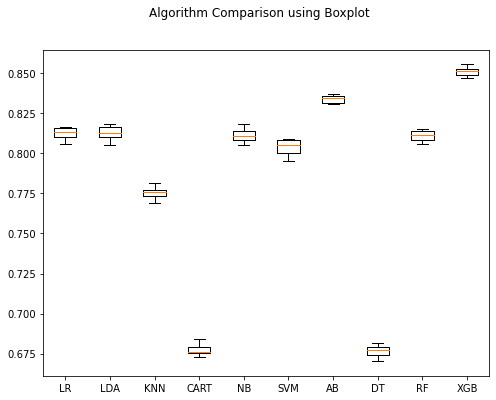

In [12]:
compareModels(accuracies, results, classifiers)

# Make Predictions using Best Classifier - XGB
- XGB provides superior accuracy result over all the classifiers
- now check the accuracy of the best model using validation set 

In [12]:
def testBestModel(model, X_validation, Y_validation):
    # make predictions on validation dataset
    Y_predictions = model.predict(X_validation)
    print("Accuracy = {:.2f}".format(accuracy_score(Y_validation, Y_predictions)))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_validation, Y_predictions))
    print('Classification Report:')
    print(classification_report(Y_validation, Y_predictions))
    return Y_predictions

In [23]:
# train the best model and find the validation accuracy
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
Y_predictions = testBestModel(XGB, X_validation, Y_validation)

Accuracy = 0.85
Confusion Matrix:
[[ 5785  5028]
 [ 1868 32448]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63     10813
           1       0.87      0.95      0.90     34316

    accuracy                           0.85     45129
   macro avg       0.81      0.74      0.77     45129
weighted avg       0.84      0.85      0.84     45129



### Confusion Matrix Visualization

In [13]:
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

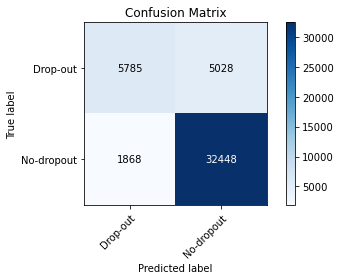

In [26]:
classes = ['Drop-out', 'No-dropout']
np.set_printoptions(precision=2)
# plot non-normalized confusion matrix
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')

## Run Experiments on KDD-Cup Dataset
- using our features

In [14]:
def KDDExperiments():
    path = 'data/kddcup15'
    db_path = os.path.join(path, 'kdd_all_normalized_features.csv')
    df = pd.read_csv(db_path)
    # Features that could lead to overfitting the models
    bad_features = ['enrollment_id']
    df.drop(labels=bad_features, axis='columns', inplace=True)
    dep_var = 'truth'
    X = df.loc[:, df.columns != dep_var]
    y = df[dep_var]
    return df, X, y

In [33]:
df, X, y = KDDExperiments()

In [34]:
df.describe()

,action_count,server_navigate_count,server_access_count,server_problem_count,server_page_close_count,server_video_count,server_discussion_count,server_wiki_count,browser_navigate_count,browser_access_count,browser_problem_count,browser_page_close_count,browser_video_count,browser_discussion_count,browser_wiki_count,truth
count,2.009040e+05,2.009040e+05,2.009040e+05,2.009040e+05,200904.0,200904.0,2.009040e+05,2.009040e+05,200904.0,2.009040e+05,2.009040e+05,2.009040e+05,2.009040e+05,200904.0,200904.0,200904.000000
mean,-2.603032e-17,-7.922270e-17,-3.282083e-17,-2.829382e-17,0.0,0.0,-7.922270e-18,3.395259e-18,0.0,-1.131753e-17,-1.584454e-17,-1.358103e-17,5.432414e-17,0.0,0.0,0.792533
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,0.0,1.000002e+00,1.000002e+00,0.0,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.0,0.0,0.405494
min,-4.747123e-01,-6.478017e-01,-5.104860e-01,-2.693657e-01,0.0,0.0,-1.500032e-01,-1.731812e-01,0.0,-2.805665e-01,-3.037063e-01,-4.903958e-01,-4.502682e-01,0.0,0.0,0.000000
25%,-4.461242e-01,-4.928193e-01,-4.844654e-01,-2.693657e-01,0.0,0.0,-1.500032e-01,-1.731812e-01,0.0,-2.805665e-01,-3.037063e-01,-4.903958e-01,-4.502682e-01,0.0,0.0,1.000000
50%,-3.603598e-01,-3.378369e-01,-3.803831e-01,-2.693657e-01,0.0,0.0,-1.500032e-01,-1.731812e-01,0.0,-2.805665e-01,-3.037063e-01,-3.947900e-01,-3.816871e-01,0.0,0.0,1.000000
75%,-3.008027e-03,1.271105e-01,3.594643e-02,-7.476730e-02,0.0,0.0,-9.400466e-02,5.406079e-02,0.0,-1.425000e-01,-1.353254e-01,-1.236665e-02,-3.878152e-02,0.0,0.0,1.000000
max,5.452887e+01,4.964400e+01,9.423049e+01,9.372165e+01,0.0,0.0,1.488342e+02,2.363857e+02,0.0,5.135631e+01,2.923030e+01,3.268483e+01,3.630921e+01,0.0,0.0,1.000000


In [35]:
X.head()

,action_count,server_navigate_count,server_access_count,server_problem_count,server_page_close_count,server_video_count,server_discussion_count,server_wiki_count,browser_navigate_count,browser_access_count,browser_problem_count,browser_page_close_count,browser_video_count,browser_discussion_count,browser_wiki_count
0,1.762310,1.289479,1.727285,1.287421,0.0,0.0,-0.150003,-0.173181,0.0,0.685899,2.356712,2.664597,1.538584,0.0,0.0
1,5.771796,6.093934,5.292106,0.509028,0.0,0.0,8.921766,2.553722,0.0,0.455788,0.235113,6.345421,2.978788,0.0,0.0
2,1.576487,0.437075,0.660441,0.314429,0.0,0.0,0.577978,-0.173181,0.0,1.284187,4.242578,0.561268,0.166962,0.0,0.0
3,0.225697,0.514567,1.154832,-0.074767,0.0,0.0,-0.150003,-0.173181,0.0,-0.280567,-0.135325,-0.012367,-0.175944,0.0,0.0
4,4.042214,1.676935,2.247697,5.957782,0.0,0.0,0.801973,-0.173181,0.0,5.242094,4.343606,3.668458,5.447708,0.0,0.0


In [39]:
X.shape

(200904, 15)

In [36]:
# split dataset 
X_train, X_validation, Y_train, Y_validation = splitDataset(X, y)

### Run Experiments

In [37]:
# run experiments
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LR 0.8451 (0.0056)
LDA 0.8430 (0.0055)
KNN 0.7903 (0.0117)
CART 0.6154 (0.0044)
NB 0.8192 (0.0055)
SVM 0.7708 (0.0056)
AB 0.8476 (0.0055)
DT 0.6140 (0.0056)
RF 0.8110 (0.0059)
XGB 0.8478 (0.0046)


### Compare and Select Best Model

XGB 0.85
AB 0.85
LR 0.85
LDA 0.84
NB 0.82
RF 0.81
KNN 0.79
SVM 0.77
CART 0.62
DT 0.61


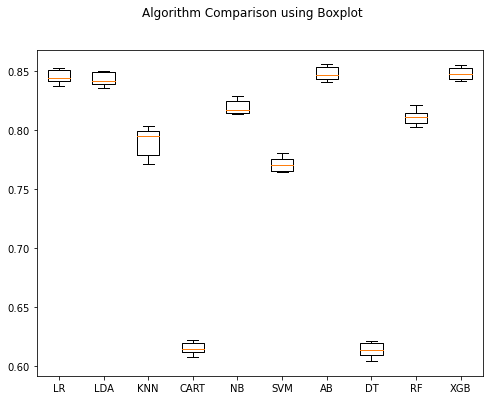

In [40]:
# compare models using Boxplot
compareModels(accuracies, results, classifiers)

### Make Predictions using Best Classifier: XGB

In [41]:
# train the best model and find the validation accuracy
bestModel = XGBClassifier()
bestModel.fit(X_train, Y_train)
Y_predictions = testBestModel(bestModel, X_validation, Y_validation)

Accuracy = 0.86
Confusion Matrix:
[[ 4098  4240]
 [ 1425 30418]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.49      0.59      8338
           1       0.88      0.96      0.91     31843

    accuracy                           0.86     40181
   macro avg       0.81      0.72      0.75     40181
weighted avg       0.85      0.86      0.85     40181



### Confusion Matrix Viz

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

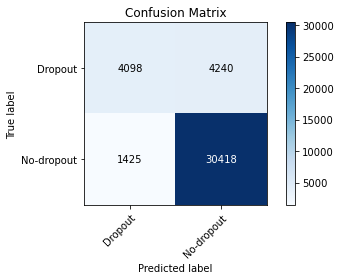

In [42]:
classes = ['Dropout', 'No-dropout']
np.set_printoptions(precision=2)
# plot non-normalized confusion matrix
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')

## Run Experiments on Stanford KDD-Cup dataset

In [1]:
! ls data/stanford

normalized_all_features.csv          trainFeatureVectorWithLabel.csv
testFeatureVectorWithLabel.csv       validationFeatureVectorWithLabel.csv


In [4]:
path = 'data/stanford'
db_path = os.path.join(path, 'normalized_all_features.csv')
df = pd.read_csv(db_path, index_col=0)
# Features that could lead to overfitting the models
bad_features = ['enrollment_id']
df.drop(labels=bad_features, axis='columns', inplace=True)
dep_var = 'label'
X = df.loc[:, df.columns != dep_var]
y = df[dep_var]

In [5]:
df.describe()

,label,avg_chapter_delays,server_discussion_percent,act_cnt_weekDay_01,browser_html_percent,parallel_enrollments,browser_dictation,act_cnt_day_00,act_cnt_day_01,act_cnt_day_02,...,server_course_percent,browser_course_info_percent,browser_course,browser_vertical_percent,sessions_in_week_1,sessions_in_week_0,sessions_in_week_3,sessions_in_week_2,sessions_in_week_4,browser_about
count,120542.000000,1.205420e+05,120542.0,1.205420e+05,120542.0,1.205420e+05,120542.0,120542.0,1.205420e+05,1.205420e+05,...,120542.0,120542.0,120542.0,120542.0,1.205420e+05,1.205420e+05,1.205420e+05,1.205420e+05,1.205420e+05,120542.0
mean,0.792927,-8.158079e-17,0.0,4.715653e-18,0.0,-7.545044e-17,0.0,0.0,-1.650478e-18,-5.446579e-17,...,0.0,0.0,0.0,0.0,-4.291244e-17,-3.984726e-17,-6.318974e-17,7.922296e-17,-2.829392e-17,0.0
std,0.405210,1.000004e+00,0.0,1.000004e+00,0.0,1.000004e+00,0.0,0.0,1.000004e+00,1.000004e+00,...,0.0,0.0,0.0,0.0,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0
min,0.000000,-4.423191e-01,0.0,-3.000336e-01,0.0,-4.499334e-01,0.0,0.0,-2.228730e-01,-2.302285e-01,...,0.0,0.0,0.0,0.0,-4.416842e-01,-5.246524e-01,-3.930556e-01,-4.227635e-01,-2.848968e-01,0.0
25%,1.000000,-4.423191e-01,0.0,-3.000336e-01,0.0,-4.499334e-01,0.0,0.0,-2.228730e-01,-2.302285e-01,...,0.0,0.0,0.0,0.0,-4.416842e-01,-5.246524e-01,-3.930556e-01,-4.227635e-01,-2.848968e-01,0.0
50%,1.000000,-4.423191e-01,0.0,-3.000336e-01,0.0,-4.499334e-01,0.0,0.0,-2.228730e-01,-2.302285e-01,...,0.0,0.0,0.0,0.0,-4.416842e-01,-5.246524e-01,-3.930556e-01,-4.227635e-01,-2.848968e-01,0.0
75%,1.000000,1.948373e-02,0.0,-1.823852e-01,0.0,6.527803e-01,0.0,0.0,-2.228730e-01,-2.302285e-01,...,0.0,0.0,0.0,0.0,6.193388e-02,-2.910967e-02,1.265271e-01,8.705820e-02,-2.848968e-01,0.0
max,1.000000,2.572651e+01,0.0,1.057012e+02,0.0,1.167992e+01,0.0,0.0,8.361040e+01,3.107840e+01,...,0.0,0.0,0.0,0.0,4.035138e+01,4.209202e+01,4.169314e+01,3.577458e+01,2.640737e+01,0.0


In [6]:
X.head()

,avg_chapter_delays,server_discussion_percent,act_cnt_weekDay_01,browser_html_percent,parallel_enrollments,browser_dictation,act_cnt_day_00,act_cnt_day_01,act_cnt_day_02,act_cnt_day_03,...,server_course_percent,browser_course_info_percent,browser_course,browser_vertical_percent,sessions_in_week_1,sessions_in_week_0,sessions_in_week_3,sessions_in_week_2,sessions_in_week_4,browser_about
0,0.401837,0.0,0.317621,0.0,3.960922,0.0,0.0,-0.222873,-0.230229,0.765347,...,0.0,0.0,0.0,0.0,2.076406,-0.029110,1.685275,2.636167,2.141673,0.0
1,-0.442319,0.0,-0.300034,0.0,-0.449933,0.0,0.0,-0.222873,-0.230229,-0.222789,...,0.0,0.0,0.0,0.0,-0.441684,-0.524652,-0.393056,-0.422764,-0.284897,0.0
2,-0.442319,0.0,-0.300034,0.0,-0.449933,0.0,0.0,-0.222873,-0.230229,-0.222789,...,0.0,0.0,0.0,0.0,0.061934,-0.524652,-0.393056,-0.422764,-0.284897,0.0
3,0.866122,0.0,-0.094149,0.0,0.652780,0.0,0.0,-0.222873,-0.230229,-0.222789,...,0.0,0.0,0.0,0.0,1.572788,1.457518,-0.393056,2.126345,-0.284897,0.0
4,0.429975,0.0,1.964698,0.0,-0.449933,0.0,0.0,-0.109431,-0.230229,10.798728,...,0.0,0.0,0.0,0.0,7.616205,0.466433,6.361519,0.087058,4.568243,0.0


In [7]:
X.shape

(120542, 139)

In [15]:
# create validation dataset
X_train, X_validation, Y_train, Y_validation = splitDataset(X, y)

In [16]:
# run experiments
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LR 0.8722 (0.0052)
LDA 0.8668 (0.0051)
KNN 0.7949 (0.0034)
CART 0.7092 (0.0057)
NB 0.7684 (0.0053)
SVM 0.8163 (0.0041)
AB 0.8756 (0.0049)
DT 0.7098 (0.0061)
RF 0.8443 (0.0040)
XGB 0.8759 (0.0038)


XGB 0.88
AB 0.88
LR 0.87
LDA 0.87
RF 0.84
SVM 0.82
KNN 0.79
NB 0.77
DT 0.71
CART 0.71


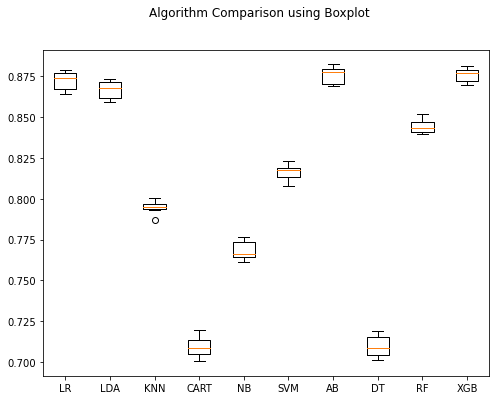

In [17]:
# compare models
compareModels(accuracies, results, classifiers)

In [19]:
# train the best model and find the validation accuracy
bestModel = XGBClassifier()
bestModel.fit(X_train, Y_train)
Y_predictions = testBestModel(bestModel, X_validation, Y_validation)

Accuracy = 0.88
Confusion Matrix:
[[ 2879  2173]
 [  817 18240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      5052
           1       0.89      0.96      0.92     19057

    accuracy                           0.88     24109
   macro avg       0.84      0.76      0.79     24109
weighted avg       0.87      0.88      0.87     24109



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

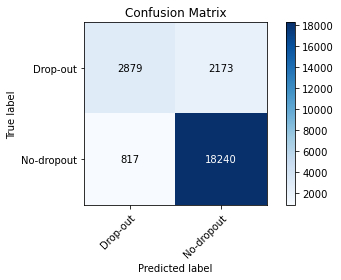

In [20]:
classes = ['Drop-out', 'No-dropout']
np.set_printoptions(precision=2)
# plot non-normalized confusion matrix
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')